<a href="https://colab.research.google.com/github/StefanHubner/MachineLearningEconomics/blob/main/Preliminaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probability

## Language and Notation

The set of all possible outcomes of an experiment is called the **sample space** which we will denote by $ \Omega $ (e.g. $ \Omega = \left\{ HH, HT, TH, TT \right\} $). We refer to its elements $ \omega \in \Omega $ as elementary events.


An **event** is a subset of the sample space $ A \subseteq \Omega $. It allows us to define statements such as "at least one head occurs" with corresponding event $ A = \{HH, HT, TH\} $.



We call the set of all possible events a **sigma-algebra** which is denoted by $ \mathcal{F} = \sigma(\Omega) $. This includes the **null event** $ \emptyset $ and the **sure event** $ \Omega $.


A **probability measure** $P$ is a function that takes an event and measures how likely it will occur (e.g. for a fair coin we know that $ P(\{HH\}) = \frac{1}{4} $).


A **probability space** is a triple $ (\Omega, \mathcal{F}, P) $.

## Probability Measure

### Definition

1. $P(A) \geq 0$ for any event $A \subseteq \Omega$,

2.  $P(\Omega) =1$,

3. If subsets $A_n\in\Omega,n=1,2,...$ are disjoint (do not intersect),
then $P( \bigcup_{n=1}^{\infty} A_n) =
\sum_{n=1}^{\infty} P(A_n)$. This is called countable additivity.


A few results that could be derived from the definition:

* $P(\emptyset) =0$,
* $P(\Omega \setminus A)  =1 - P(A)$, where $\Omega \setminus A = \{\omega \notin A \}$,
* If $A\subseteq B$ then $P(A) \leq P(B)$,
* $P(A\cup B) =P(A) + P(B) - P( A\cap B)$,
* For any sets $A_{n}$,
$P( \bigcup_{n=2}^{\infty} A_n ) \leq \sum\nolimits_{n=1}^{\infty}P( A_n )$.


We can define different probability functions (e.g., $P_1, P_2, P_3$) on the same sample space

## Random Variables

A **random variable** $X$ is a function from ($\Omega$, $\mathcal{F}) $ into $ (\mathbb{R}, \mathcal{B}) $ connecting an elementary event $ \omega $ to a real valued outcome.


> For example, let's assume we have two coloured dice and define their respective face values as two random variables $X(⚄⚂) = 5, Y(⚄⚂) = 3$. Their value tells us that for outcome $\omega_{53} = ⚄⚂ $ the
random variable $X$ will have realised value $5$ and the random variable $Y$ will have realised value $3$.


When we write a formula with random variables, the formula defines a new function:
$$ Z : \Omega \to \mathbb{R} : \omega \mapsto X(\omega)+ Y(\omega) $$
We usually write the short hand definition $ Z = X + Y $ but keep this definition in mind!

---

Think of all random variables as simultaneously determined by the outcome $\omega$.
Any expression you construct from random variables is also uniquely determined
by the outcome $\omega$.

\begin{equation*}
\begin{array}{llcccccc}
&  & X_1 & X_2 & X_3 & Y & X_3 / Y & \dots \\
\omega _{1} & ~ & 0 & 0 & 0 & 1.5 & 0 & \dots \\
\omega _{2} & ~ & 0 & 3 & 3 & 2 & 1.5 & \dots \\
\omega _{3} & ~ & 1 & 0 & 1 & 1 & 1 & \dots \\
\omega _{4} & ~ & 2 & 1 & 4 & 0.5 & 8 & \dots \\
... & ~ & ... & ... & ... & ... & ... & \dots
\end{array}%
\end{equation*}

## Measuring Events

The probability measure $P$ determines how likely different $\omega$'s are to happen and, consequently, values for $ X_{1}, X_{2},X_{3},Y$ and their functions.

We often want to make statements not only involving an elementary event $ \omega \in \Omega$ but instead a collection $ A \in \mathcal{F} $ of them.

We can then define the corresponding event for the random variable as $\{\omega: Z(\omega) \in B \}$ where $ B \in \mathcal{B} $, the Borel sigma-algebra defined as the smallest set of all open intervals on $ \mathbb{R} $.

If we write $P(\dots)$ around the statement, we mean the probability assigned by measure $P$ to the event described in parentheses e.g.
$$
P(\{\omega: Z(\omega) \in (a,b) \}) = P(Z \in (a,b)) = P (a < Z < b).
$$



> In our two dice example we might want to be interested in the event that corresponds to the sum of the eyes as $ Z = X + Y $ being less or equal to 3.
>
> For this, we can define the event $ B = (0, 3] \in \mathcal{B} $ that their sum is less or equal than 3.
$$ A = \{\omega: Z(\omega) \in (0, 3] \} =
\{ ⚀⚀, ⚀⚁, ⚀⚁\}$$

We can then measure this event with different probability measures.

> Let us denote as $ P_0 $ the probability measure corresponding to a fair dice that gives equal likelihood $ P_0(\omega) = \frac{1}{36} $ to all elementary events $ \omega \in \Omega $. In this case we get $ P(A) = \frac{3}{36} = \frac{1}{12} $.

## Distribution Functions

### Absolute continuity

An elementary element in $ \mathbb{R} $ is a point,  which is (losely speaking) an interval $ B \in \mathcal{B} $ of width zero. We sometimes call these intervals to have zero (Lebesque) measure.

If a probability measure for a random variable $ X $gives zero probability to **any zero-measure intervals**, we call the random variable $ X $ a **continuous random variable**.

If **every zero-measure interval** in the image of a random variable $ Y $ is given non-zero probability by it's probability measure, we call the random variable $ Y $ discrete.

There are also **mixed** random variables.

> In our example, the image of $ Z $ is $ \{ 2, \ldots\, 12 \} $. For any of these points $ P_0 $ associates a probability to the corresponding event of $ \frac{1}{36} > 0 $.

## Continuous vs Discrete
Instead of working with general probability measures, we will often distinguish discrete and continuous random variables and work with distribution functions:
$$ F_{X}(x) = P(X \leq x) $$

For a **continuous** random variable there exists a function $f_{X}(x) \geq 0$, called the **probability density function**, satisfying
$$
F_{X}(x) = \int_{-\infty }^{x}f_{X}(t)dt \text{ for all } x \in \mathbb{R}.
$$

In this case we can measure:
$$ P(a < X < b) = F_X(b) - F_X(a) = \int_{a}^{b}f_{X}(t)dt $$
by the **fundamental theorem of calculus**.



> *Exercise: Use the probability of the sure event to show that any density function must satisfy* $\int_{-\infty}^{\infty} f_X(x)dx = 1$.

If the random variable $X$ is **discrete** we have
$$
\sum_{k=1}^{\infty} P(X = x_k) = 1
$$
for some (possibly uncountable) sequence of numbers $\{x_1, x_2, x_3, \dots \}$.


We call $p(x_k) = P(X=x_k)$ the **probability mass function** of $X$.



## Moments

The **expectation** for any (measurable) function m is
$$
\mathbb{E} m(X) = \left\{
\begin{array}{ll}
\sum\limits_{k=1}^{\infty} m(x_k) P(X = x_k)
 & \text{ if $X$ is discrete}, \\
\int\limits_{-\infty}^{\infty} m(x) f_X(x) dx
 & \text{ if $X$ is continuous}.
\end{array}
\right.
$$

**Special cases**:
* Expected Value: $ m_1(X) = X $
* Variance: $ m_2(X) = (X - m_1(X))^2 $
* Covariance: $ m_3(X, Y) = (X - m_1(X))(Y - m_1(Y)) $

## Independence
Events $\{ A_{k},k = 1,2,\dots n\}$ are **independent**
$$
    P\hspace{-2ex}\underbrace{\left( \bigcap_{k=1}^{n} A_k \right)}_{\text{intersection of sets}} \hspace{-1.5ex} = \prod_{k=1}^{n}  P\left( A_k \right).
$$

~

This leads to a definition of **independent random variables** $\{X_1, X_2, \dots, X_n\}$  if
$$
P\underbrace{( X_1 \in B_1, X_2 \in B_2, \dots X_n \in B_n )}_{\text{all true }}
= \prod\limits_{k=1}^{n} P( X_k \in B_k )
$$
for any sets of real numbers $B_1, \dots, B_n \in \mathcal{B} $.


Consequently, random variables are **independent** if their **conditional probability**
$$ P(X_1 \in B_1 | X_2 \in B_2) = \frac{P(X_1 \in B_1, X_2 \in B_2)}{P(X_2 \in B_2)} = P(X_1 \in B_1) . $$


# Statistical Inference

The process of drawing conclusions
from the data that is subject to random variation about features of
the probability distribution that has generated the data.

The process of statistical inference typically involves:

* a particular realisation of the observed random variables (the data)
* a statistical model of the different processes that could have
generated the data

The conclusion of statistical inference is a proposition:
* an **estimate**: a specific number that is our best guess about
the value of an unknown parameter
* a **confidence interval**: a set of guesses about the unknown
parameter that expresses estimation uncertainty and has a high probability
of containing the true parameter
* a **statement** about a hypothesis regarding the data generating process,
e.g., acceptance or rejection


A **statistical model** could be described using the following
two elements:
* The sample space $\Omega$ and the observed random variables.
These should describ\iteme all the feasible realisations of the data.
Random variables are named explicitly, whereas the sample space is often
implicit.
* A set $\mathcal{P}$ of possible probability distributions governing
the distribution of the random variables.


In this course we will work with **parametric models**.
A model is parametric if the set of possible distributions could be described
by a finite-dimentional parameter $\theta \in \Theta \subseteq \mathbb{R}^d$.


We conjecture that one of the probability distributions $P_{\theta_0} \in \mathcal{P}$
is the true distribution (and $\theta_0$ is the true parameter value). The sample
we observe is one random draw from this distribution.


Random variables $\{X_1,X_2,\dots,X_n\}$ are called
**i.i.d. (independent and identically distributed)** if

1. $\{X_1,X_2,\dots,X_n\}$ are independent
2. All $n$ variables have the same marginal distribution $F_{X_k}(t) = F(t)$ for $k=1\ldots n$

Realisation of i.i.d. variables are also called a **random sample** from distribution $F$.


When we are dealing with an i.i.d. sample, we can use the same notation ($F(t), f(t)$)
to denote the marginal CDF and PDF (or PMF) of each variable.

## Random sample

If $F(t)$ describes the distribution of some characteristic in a **population**,
then the IID assumption is accurate when individuals are randomly sampled (with replacement)
from the population.

IID sample assumption often inaccurately describes actual data. The most common scenarios
that violate independence are:
> * Observations over time. Subsequent observations of the same variable are often correlated,
especially when measurements are frequent. Sometimes the **identically distributed**
part of assumption is also incorrect in time series.
* Observations that are sampled in groups (**clustering**). For example, if you collect
data on pupils in a sample of UK schools, values of some variables will be correlated
for pupils in the same school.   
* **Sample selection**: In many studies there is an opt-in policy. For example students taking parts of experiments and getting paid a  certain reward. This makes students with less income more likely to attend.  

### Frequentist Inference

The statistical inference framework covered in this course (and in all other Econometrics
courses in your programme) is called **frequentist**.

Once we have specified a statistical model,
we choose an inference procedure that describes
**what inference we would make based on any possible
values of the sample**.

For each possible parameter $\theta$ we could calculate
the probability distribution of the sample (how likely is each realisation). Since we know what inference we would make based on each realisation, this probability distribution tells us how likely we are to make each specific inference.


We are looking for inference procedures that will perform well for any possible value of $\theta$.


## Estimation

Point estimation: guessing one specific numerical value for the unknown parameter.

* We think of $\theta_0 \in \Theta$ as the true (but unknown to us)
parameter value. $\theta_0$ is called the **estimand**.
* We propose an **estimator**, which is a function of
the sample realisations $\widehat{\theta} = \widehat{\theta}(X_1,X_2,\dots,X_n)$
(a formula that depends only on the observed random variables).
* From a specific observed sample $(x_1,x_2,\dots,x_n)$ we compute the realised value $\widehat{\theta}(x_1,x_2,\dots,x_n)$. This value is called the **estimate **.


The estimator $\widehat{\theta} $ is itself a random variable whose  **sampling distribution** is also determined by $P_{\theta_0}$.

> Example: $\{X_1,X_2\}$ are IID Bernoulli$(\theta)$. $\Theta = \{\theta_1,\theta_2\}$,
$\theta_1 = 1/3$, $\theta_2 = 2/3$
>
> We consider the estimator $\widehat{\theta} = \frac{X_1+X_2}{2}$.
>
> $$
\begin{array}{l|lcccccc}
&  & X_1 (\omega) & X_2 (\omega) & \widehat{\theta}(\omega) & & P_{\theta_1} & P_{\theta_2}  \\
\hline
\omega_1 & ~ & 0 & 0 & 0 & & 4/9 & 1/9 \\
\omega_2 & ~ & 0 & 1 & 1/2 & & 2/9 & 2/9  \\
\omega_3 & ~ & 1 & 0 & 1/2 & & 2/9 & 2/9 \\
\omega_4 & ~ & 1 & 1 & 1 & & 1/9 & 4/9
\end{array}%
$$


# Maximum Likelihood Estimation

## The Likelihood Principle

We assume we have $ n $ independent copies of random variables $ X_1, \ldots, X_n $ with $ P(X_i \leq x) = P_{\theta}(X_i \leq x) = F_{\theta}(x) $ with corresponding p.d.f or p.m.f. $ f(x|\theta) $

Thus, the likelihood that we observe realisations $ (x_1, \ldots x_n) $
$$ f(x_1, \ldots, f_n | \theta) =\prod\limits_{i=1}^n f_i(x_i, \theta) =\prod\limits_{i=1}^n f(x_i, \theta)  $$

where the first equality follows from independence and the second from
the identical distribution.

For each $\theta$, the density function tells us how likely we would observe
 $(X_1 = x_1, X_2 = x_2, \dots, X_n = x_n)$.


Likelihood function
$$
\mathcal{L}(\theta) = \prod_{i=1}^{n} f(x_i; \theta)
$$
has the same mathematical expression as the joint density function.
However, it is specified **as a function of the parameter $\theta$**
for a fixed value of the sample $(x_1, x_2, \dots, x_n)$. When we differentiate
$\mathcal{L}(\theta)$, we treat $(x_1, \dots, x_n)$ as constants.


The **maximum likelihood estimator (MLE)** $ \widehat{\theta}_{\text{MLE}}$ is the value of $\theta$
that maximises the likelihood function given a particular sample $(x_1, \dots, x_n)$:
$$
\widehat{\theta}_{\text{MLE}}\equiv \arg\max_{\theta \in \Theta} \mathcal{L}(\theta).
$$

Since $\log(\ )$ is a strictly increasing function and $\mathcal{L}(\theta) \geq 0$
$$
\widehat{\theta}_{\text{MLE}}= \arg\max_{\theta \in \Theta} \mathcal{L}(\theta)
             = \arg\max_{\theta \in \Theta} \left( \log\mathcal{L}(\theta) \right)
$$
It is usually easier to find the MLE by maximising the \emph{log-likelihood}
$$
\ell(\theta) \equiv \log \mathcal{L}(\theta)
$$
For an IID sample,
$$
\ell(\theta) = \log f(x_1 \ldots x_n; \theta) = \log \left( \prod_{i=1}^{n} f(x_i; \theta) \right) = \sum\limits_{i=1}^n \log f(x_i; \theta)
$$


Let $\theta = (\theta_1, \theta_2, \dots, \theta_k)$.

If the likelihood function is differentiable and its maximum is not on the boundary
of the parameter space $\Theta$, then $\widehat{\theta}_{\text{MLE}} $ must satisfy the First-Order Conditions:
$$
\frac{\partial}{\partial \theta_j} \ell(\theta) = 0, \ \ j = 1,\dots,k
$$
In addition to FOCs we need to verify the Second-Order Conditions to ensure that
it is a maximum and not a minimum or a saddle point.

If the log-likelihood function $\ell(\theta)$ is globally concave, then $\widehat{\theta}_{\text{MLE}}$
satisfying the FOCs will be a global maximum.



## Conditional Likelihood



## Logistic Errors



We first simulate some data.

For this we let $ n = 1,000 $, $ \beta_0 = (1.5, 0.8) $, $ X \sim U[-1, 1] $, and define
$$f(y_i|x_i, \beta) = \sigma(x_i^T \beta_0) = \frac{1}{1+exp(-x_i^T \beta_0)} $$.

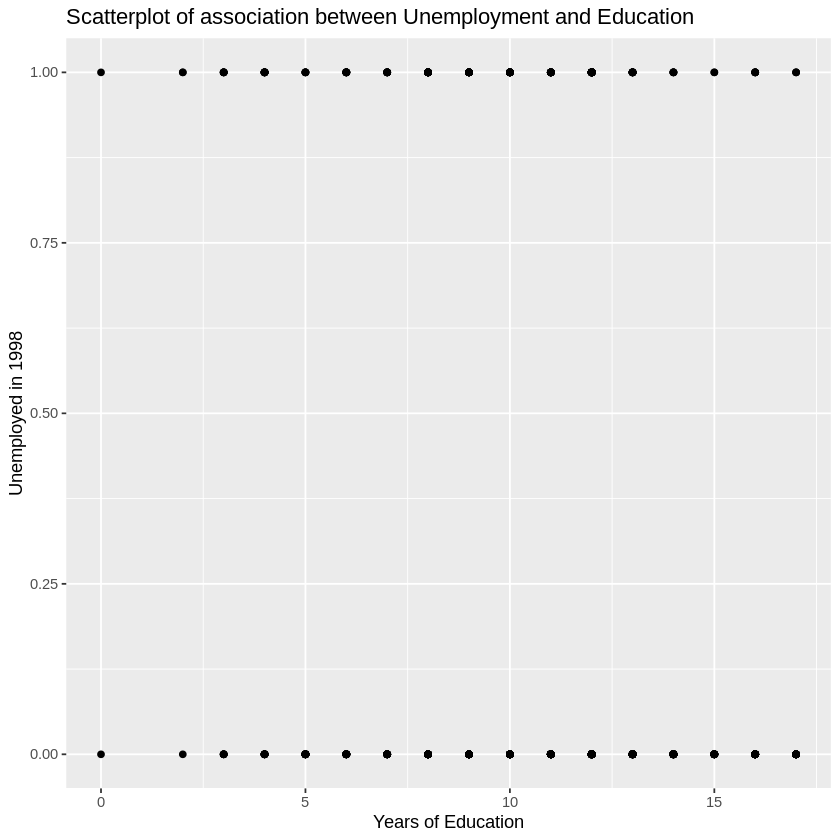

In [62]:
if (!require(wooldridge)) install.packages("wooldridge", quiet = TRUE)

# Load necessary libraries
suppressPackageStartupMessages(
  library(wooldridge)
)

data('jtrain98')
p <- jtrain98 %>%
  ggplot(aes(y = unem98, x = jtrain98$educ)) +
  geom_point() +
  labs(x = "Years of Education",
       y = "Unemployed in 1998",
       title = "Scatterplot of association between Unemployment and Education")

p


Now let us estimate the model

In [61]:
# Define the log-likelihood function for a binary choice model with logistic errors
build_ll <- function(y, x) {
  function(beta) {
    p_hat <- plogis(cbind(1, x) %*% beta)
    sum(y * log(p_hat) + (1 - y) * log(1 - p_hat))
  }
}

# Estimate the model parameters using optim
start <- c(1, 1) # Initial guesses for the parameters
result <- optim(start, build_ll(jtrain98$unem98, jtrain98$educ))

# Print the estimated parameters
cat("Estimated parameters: (", paste0(result$par, collapse = ", "), ")\n")
cat("Log-Likelihood: ", result$value, "\n")

p +

Estimated parameters: ( 36.6094051308808, -0.159053006370361 )
Log-Likelihood:  -32621.39 


### *Note*
*This is as far as we will go in this course. Maximum Likelihood estimation is one of the most fundamental methods in statistics and there are a lot of incredible results. You will learn more about them in QM6.*